<h1 align="center">Capital One Data Challenge</h1> 

## Problem Statement

As a consultant to the real estate company, here is the task of analyzing the properties in the New York City for short term rental options and suggesting the top zip codes to invest in. The company has already concluded that two bedroom properties are the best to invest in as its profitable. 

## Data Source

There are two datasets provided for the analysis:
1. Revenue data (Airbnb) - Detailed information about the properties situated in New York City.
2. Cost data (Zillow) - Estimate for two-bedroom properties.

## Assumptions

Here are some assumptions that are taken in this analysis:
- Occupancy rate of 75%  for the properties in the New York City.
- The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
- The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
- All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.)
- Cleaning fees that are charged are always in excess of how much it actually costs for cleaning. 25% of the cleaning fees is considered in calculating annual revenue.

## Metadata Created

1. Annual_Revenue - The amount of money that would be generated considering 75% occupancy rate. Both rental price and cleaning fees (25%) have been considered while calculating this field.
2. Breakeven_period - The average time, in years, the properties takes to reach breakeven, i.e. to start earning profits
3. Appreciation - Factor by which the properties located in a particular zipcode has appreciated in the five years window, i.e. between 2012-06 to 2017-06

## Approach for analysis

In order to find the most profitable zipcodes to invest in, I will be implementing the following steps:

1. Understanding the data - The most important thing to do before starting the analysis is to understand the data. In this step, I will be checking the distribution of the data, relationship between different variables, missing values, outliers, etc.

2. Data Preparation - In order to perform the analysis, the data has to be prepared in a way that issues encountered in step 1 is resolved. In this step, I will be imputing the data wherever the values are missing using the right imputation technique. Outliers will be removed to avoid skewness in the data. Relevant variables will be included for further analysis

3. Exploratory data Analysis - Once the data is prepared, it is ready to do some exploratory analysis. In this step, I will be diving deep to understand the data further. Various types of visualizations will be also be used to extract insights.

4. Coming up with different approaches - There would be many ways of finding the right locality to invest in. Therefore, it is good to evaluate every approach in order to find the best zipcodes.

5. Solution - After evaluating all the approaches, I will select the one which would be reasonable and be aligned with company's goals. 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the listing.csv dataset 
airbnb = pd.read_csv('F:/Capital One/listings.csv.gz', compression='gzip')

#Reading the Zip_Zhvi_2bedroom.csv dataset
zillow = pd.read_csv('F:/Capital One/Zip_Zhvi_2bedroom.csv')

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Dimension of the airbnb dataset
airbnb.shape

(48895, 106)

In [4]:
# Checking for number of categorical and numerical features present in the dataset
categorical = len(airbnb.select_dtypes(include=['object']).columns.tolist())
numerical = len(airbnb.select_dtypes(include=['number']).columns.tolist())
print("There are {} categorical columns in the airbnb dataset".format(categorical))
print("There are {} numerical columns in the airbnb dataset".format(numerical))

There are 63 categorical columns in the airbnb dataset
There are 43 numerical columns in the airbnb dataset


In order to filter out the most profitable zipcodes to invest in, I have shortlisted the relevant features from the dataset. The features which were relevant to the houses have been considered.
Here is the short description of what the features mean
- id : Identifier used by AirbnB for the listing
- neighbourhood_group_cleansed : Name of the area where the property is located. 
- state : State where the property is located. 
- zipcode : Zip code where the property is located. 
- property_type : Indicates the type of house is this is considered.  Examples are house, apartment, townhomes, etc...
- room_type : Indicates specific rooms available for rent and/or the entire home. 
- bedrooms : Indicates the number of bedrooms within the property. 
- bed_type : Indicates the type of bed the property has.  ie. futon, real bed, airbed, etc. 
- latitude : The angular distance of a place north or south of the earth's equator, expressed in degrees and minutes.
- longitude : The angular distance of a place east or west of the meridian at Greenwich, England, expressed in degrees and minutes.
- square_feet : Square footage of the property or space for rent. 
- price : Price the host is charging to stay per night.
- cleaning_fee : Price the host is charging to clean up after your stay. 
- review_scores_rating : Overall score given based on accuracy, cleanliness, check-in, communication, location, and value. 

In [5]:
# Extracting the relevant columns for analysis
airbnb_subset = airbnb[["id","neighbourhood_group_cleansed","state","zipcode","property_type","room_type","bedrooms",
                        "bed_type","latitude", "longitude", "square_feet","price","cleaning_fee","review_scores_rating"]]

In [6]:
# Dimension of the extracted dataset
airbnb_subset.shape

(48895, 14)

### Understanding the data and Data Preparation

In [7]:
# Checking for number of categorical and numerical features present in the dataset
categorical = len(airbnb_subset.select_dtypes(include=['object']).columns.tolist())
numerical = len(airbnb_subset.select_dtypes(include=['number']).columns.tolist())
print("There are {} categorical columns in the airbnb dataset".format(categorical))
print("There are {} numerical columns in the airbnb dataset".format(numerical))

There are 8 categorical columns in the airbnb dataset
There are 6 numerical columns in the airbnb dataset


In [8]:
# Checking the summary statistics of airbnb_subset dataset
airbnb_subset.describe()

,id,bedrooms,latitude,longitude,square_feet,review_scores_rating
count,4.889500e+04,48873.000000,48895.000000,48895.000000,408.000000,37873.000000
mean,1.901714e+07,1.178237,40.728949,-73.952170,708.120098,93.926438
std,1.098311e+07,0.755516,0.054530,0.046157,573.520584,8.577791
min,2.539000e+03,0.000000,40.499790,-74.244420,0.000000,20.000000
25%,9.471945e+06,1.000000,40.690100,-73.983070,315.000000,92.000000
50%,1.967728e+07,1.000000,40.723070,-73.955680,700.000000,96.000000
75%,2.915218e+07,1.000000,40.763115,-73.936275,950.000000,100.000000
max,3.648724e+07,14.000000,40.913060,-73.712990,5000.000000,100.000000


In [9]:
# Checking the datatypes of the columns
airbnb_subset.dtypes

id                                int64
neighbourhood_group_cleansed     object
state                            object
zipcode                          object
property_type                    object
room_type                        object
bedrooms                        float64
bed_type                         object
latitude                        float64
longitude                       float64
square_feet                     float64
price                            object
cleaning_fee                     object
review_scores_rating            float64
dtype: object

'zipcode', 'price' and 'cleaning_fee' are shown are categorical in this dataset. They should be converted to numerical datatypes

In [10]:
# Checking the number of missing values present in the featues in the airbnb_subset datset
airbnb_subset.isna().sum().sort_values(ascending=False)

square_feet                     48487
review_scores_rating            11022
cleaning_fee                    10645
zipcode                           517
bedrooms                           22
state                               6
price                               0
longitude                           0
latitude                            0
bed_type                            0
room_type                           0
property_type                       0
neighbourhood_group_cleansed        0
id                                  0
dtype: int64

square_feet has high number of missing values. Thus, this feature should be dropped

In [11]:
# Dropping the square_feet column 
airbnb_subset.drop(labels='square_feet', axis=1, inplace=True)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
# Checking if zipcode has inconsistency
airbnb_subset['zipcode'].unique()

array(['11218', '10018', '10027', '11238', '10029', '10016', '11216',
       '10019', '10025', '10002', '10036', '11215', '10014', '11211',
       '11205', '10011', '11217', '10034', '10003', '10031', '11222', nan,
       '11237', '11226', '10009', '10024', '11225', '11101', '11221',
       '11206', '10010', '11249', '10001', '10162', '10035', '10032',
       '10075', '11377', '11201', '11233', '11231', '10023', '10128',
       '10040', '11234', '11367', '10028', '11104', '10065', '10301',
       '10452', '10006', '10039', '11385', '10021', '11434', '11379',
       '10026', '11105', '10044', '10022', '10013', '11103', '10473',
       '10475', '11213', '10468', '11102', '10038', '10033', '11427',
       '11693', '10012', '11375', '10470', '10030', '10453', '11223',
       '10469', '11208', '11207', '10451', '11235', '10314', '11209',
       '11204', '10305', '11232', '10017', '11373', '11224', '11372',
       '11412', '10004', '11203', '11374', '10466', '11106', '10304',
       '11220',

We see that zipcode feature has both integer and string datatype values in it. Also, some of the zipcodes are of length greater than 5 digits. For e.g. '11103-3233' is one of the zipcodes. 
This inconsistency will later lead to improper join of the datasets and has to be fixed. There is nothing wrong with these zipcodes and we just need to extract the first 5 digits from it. 

In [13]:
# Converting all the zipcodes to string datatype.
airbnb_subset.zipcode = airbnb_subset.zipcode.astype('str')

# Extracting the first 5 digits of the zipcodes
airbnb_subset['zipcode'] = airbnb_subset['zipcode'].str[:5]

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
airbnb_subset[['price','cleaning_fee']].head(5)

,price,cleaning_fee
0,$149.00,$25.00
1,$225.00,$100.00
2,$150.00,$75.00
3,$89.00,NaN
4,$80.00,$80.00


In [15]:
# Removing the unwanted characters from the column and converting the datatype into float
airbnb_subset.price = airbnb_subset.price.apply(lambda x: x.strip('$').replace(',',''))
airbnb_subset['price'] = airbnb_subset['price'].astype(float)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Removing the unwanted characters from the column and converting the datatype into float
airbnb_subset['cleaning_fee'] = airbnb_subset['cleaning_fee'].astype('str').apply(lambda x: x.strip('$').replace(',',''))
airbnb_subset['cleaning_fee'] = airbnb_subset['cleaning_fee'].astype('float')

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

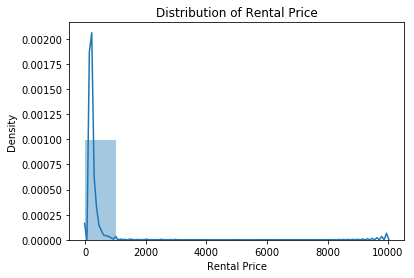

In [17]:
# Checking for distribution of price
ax = sns.distplot(airbnb_subset['price'], bins=10)
ax.set_title('Distribution of Rental Price')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Density')

The price column is highly skewed and this might be due to outliers present in the dataset.

Text(0, 0.5, 'Density')

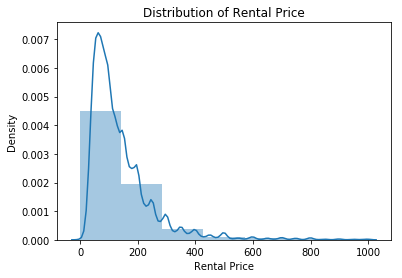

In [18]:
# Checking the price distribution for rental prices below $1000
ax = sns.distplot(airbnb_subset[airbnb_subset['price'] < 1000]['price'], 
                  bins=7) 
ax.set_title('Distribution of Rental Price')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Density')

The price distribution looks better than before, however, it is still skewed. 

In [19]:
# Checking the dimensions of outliers present in the dataset
airbnb_subset[airbnb_subset['price'] > 1000].shape

(239, 13)

We see that there are lot of high outliers in the price column. Therefore, we are keeping limit for listing price of the house at `$1000` and removing the data that is above this limit (0.5% of the data).

In [20]:
# Removing the outliers which are above $1000 rental price
airbnb_noout = airbnb_subset[airbnb_subset['price'] < 1000]

In [21]:
# Checking the dimensions of airbnb_noout dataset
airbnb_noout.shape

(48597, 13)

In [22]:
# Filtering the airbnb_set in which it contains bedroom = 2 
airbnb_set = airbnb_noout[airbnb_noout['bedrooms'] == 2]

In [23]:
# Checking the dimensions of the zillow dataset
zillow.shape

(8946, 262)

In [24]:
# Checking for number of categorical and numerical features present in the dataset
categorical = len(zillow.select_dtypes(include=['object']).columns.tolist())
numerical = len(zillow.select_dtypes(include=['number']).columns.tolist())
print("There are {} categorical columns in the airbnb dataset".format(categorical))
print("There are {} numerical columns in the airbnb dataset".format(numerical))

There are 4 categorical columns in the airbnb dataset
There are 258 numerical columns in the airbnb dataset


In [25]:
zillow.dtypes.head(10)

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
dtype: object

In [26]:
# Converting the zipcode to string so that we can join the 2 datasets
zillow['RegionName'] = zillow['RegionName'].astype('str')

In [27]:
# Renaming the features of zillow datasets and assigning it to zillow_set
zillow_set = zillow[['RegionName','2017-06']]
zillow_set.rename(columns={'RegionName':'zipcode', '2017-06':'Median_price'}, inplace=True)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [28]:
# Left joining the airbnb_set and zillow_set dataset
airbnb_zillow_joined = airbnb_set.merge(zillow_set, on='zipcode', how='left')

In [29]:
# Checking the dimensions of the airbnb_zillow_joined dataset
airbnb_zillow_joined.shape

(6438, 14)

In [30]:
# Merged the datasets for further analysis
pd.set_option('display.float_format', lambda x: '%.2f' % x)
airbnb_zillow_joined.describe()

,id,bedrooms,latitude,longitude,price,cleaning_fee,review_scores_rating,Median_price
count,6438.00,6438.00,6438.00,6438.00,6438.00,5533.00,5090.00,1538.00
mean,19131698.97,2.00,40.72,-73.96,214.06,94.59,94.04,1782289.08
std,11409494.54,0.00,0.05,0.04,127.82,55.06,8.50,646988.56
min,7750.00,2.00,40.51,-74.24,0.00,0.00,20.00,327700.00
25%,8956109.75,2.00,40.69,-73.99,129.00,60.00,92.00,1302300.00
50%,19950438.00,2.00,40.72,-73.96,185.00,95.00,96.00,1712900.00
75%,29937912.50,2.00,40.76,-73.94,259.00,120.00,100.00,2147000.00
max,36477307.00,2.00,40.91,-73.72,999.00,621.00,100.00,3316500.00


We can see that only 1538 values of Median_price are present out of 6438 values in this dataset. That means only 1/4th of the data is present for Median price. The following things could be done to tackle this problem:
1. Linear Regression - This could be done by training the data on 1/4th of the data and finding the values for the remaining records. However, this would result in very high error as the training dataset is very limited and the testing dataset is 4 times the size.
2. KNN Imputation - This could also be an option as we can assign the median price of the neighboring locality using the geo coordinates. However, this could also result in high errors as there are some areas where we dont have data at all. For example, there are no median price readings for the houses in Bronx neighborhood. 
3. Inner join - Instead of left joining the airbnb_set and zillow_set dataset, we can use inner join. Though the dataset will be reduced to 1/4th of it, but there will be no erroneous calculation made.

In [31]:
# Selecting the third approach, we will be doing inner join
airbnb_zillow_joined = airbnb_set.merge(zillow_set, on='zipcode', how='inner')

In [32]:
# Checking for null values
airbnb_zillow_joined.isna().sum().sort_values(ascending=False)

review_scores_rating            371
cleaning_fee                    198
state                             1
Median_price                      0
price                             0
longitude                         0
latitude                          0
bed_type                          0
bedrooms                          0
room_type                         0
property_type                     0
zipcode                           0
neighbourhood_group_cleansed      0
id                                0
dtype: int64

In [33]:
# Imputing cleaning fees by taking mean cleaning fee for every zipcode and substituting them in the missing field belonging
# to the respective zipcode 
airbnb_zillow_joined['cleaning_fee'].fillna(airbnb_zillow_joined.groupby('zipcode')['cleaning_fee'].transform("mean"), 
                                            inplace=True)

In [34]:
# Checking for discrepancy between zipcode and neighborhood
airbnb_zillow_joined[['zipcode',
                      'neighbourhood_group_cleansed']].groupby(by='zipcode')['neighbourhood_group_cleansed'].nunique()

zipcode
10003    1
10011    1
10013    2
10014    1
10021    1
10022    1
10023    1
10025    1
10028    1
10036    1
10128    1
10303    1
10304    1
10305    1
10306    1
10308    1
10309    1
10314    1
11003    1
11201    1
11215    1
11217    1
11231    1
11234    1
11434    1
Name: neighbourhood_group_cleansed, dtype: int64

In [35]:
# Checking for the distinct neighborhood present in the zipcode of '10013'
airbnb_zillow_joined[(airbnb_zillow_joined['zipcode']=='10013')].groupby(by='neighbourhood_group_cleansed').nunique()['id']

neighbourhood_group_cleansed
Brooklyn      1
Manhattan    96
Name: id, dtype: int64

We can see above that zipcode '10013' comes in two neighborhoods. On further research, I came to know that this zipcode comes under Manhattan which is also justified by the number of neighborhoods present in Manhattan compared to Brooklyn. Therefore, I will be replacing the neighborhood for that particular zipcode from Brooklyn to Manhattan.

In [36]:
airbnb_zillow_joined[(airbnb_zillow_joined['zipcode']=='10013') & 
                    (airbnb_zillow_joined['neighbourhood_group_cleansed'] == 'Brooklyn')]

,id,neighbourhood_group_cleansed,state,zipcode,property_type,room_type,bedrooms,bed_type,latitude,longitude,price,cleaning_fee,review_scores_rating,Median_price
617,22216259,Brooklyn,NY,10013,Apartment,Private room,2.00,Real Bed,40.62,-73.90,100.00,30.00,nan,3316500


In [37]:
# Replacing the value of the neighborhood from 'Brooklyn' to 'Manhattan' as per research 
airbnb_zillow_joined.iloc[617,airbnb_zillow_joined.columns.get_loc('neighbourhood_group_cleansed')] = 'Manhattan'

In [38]:
# Checking for missing values in the dataset
airbnb_zillow_joined.isna().sum().sort_values(ascending=False)

review_scores_rating            371
state                             1
Median_price                      0
cleaning_fee                      0
price                             0
longitude                         0
latitude                          0
bed_type                          0
bedrooms                          0
room_type                         0
property_type                     0
zipcode                           0
neighbourhood_group_cleansed      0
id                                0
dtype: int64

In [39]:
# Dropping irrelevant columns 
airbnb_zillow_joined.drop(['bedrooms','state','review_scores_rating'],axis=1,inplace=True)

## Exploratory Data Analysis

Text(0, 0.5, 'Number of properties')

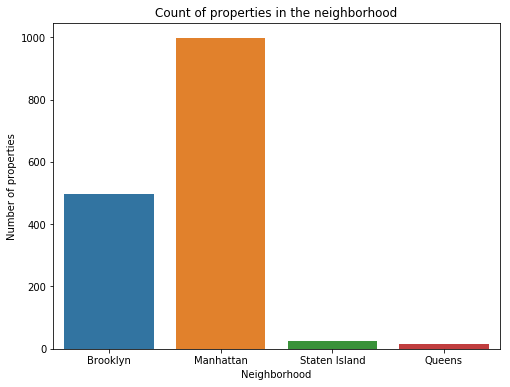

In [40]:
# Plotting the countplot of properties present in the neighborhood
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'neighbourhood_group_cleansed',data = airbnb_zillow_joined)
ax.set_title('Count of properties in the neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of properties')

Manhattan has the highest number of properties, followed by Brooklyn, Staten Island and Queens in the end.

Text(0, 0.5, 'Rental price per night')

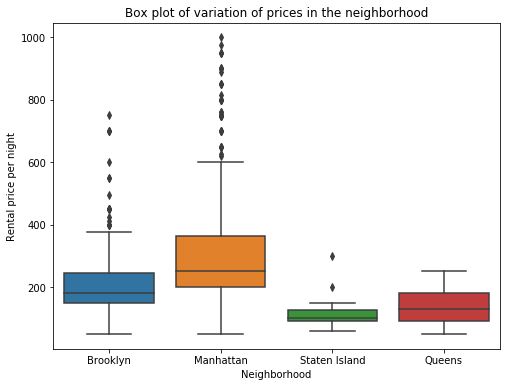

In [41]:
# Plotting the boxplot of price vs neighborhood
plt.figure(figsize=(8,6))
ax = sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price', data = airbnb_zillow_joined)
ax.set_title('Box plot of variation of prices in the neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Rental price per night')

Manhattan has the higher median rental price, followed by Brooklyn, Queens and Staten Island. The interquartile range is also greatest for Manhattan, indicating that there is a lot of variation in the rental prices of properties located in Manhattan. Staten Island on the other end, has the least interquartile range, indicating less variation in the rental prices of properties.

Text(0, 0.5, 'Density')

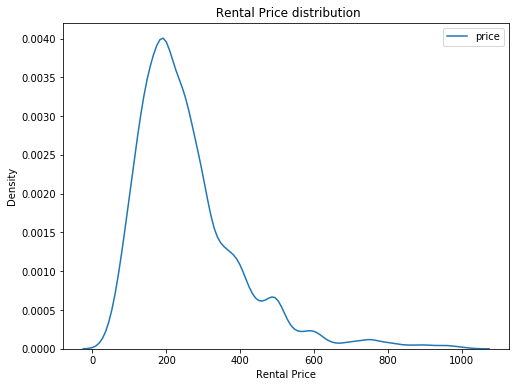

In [42]:
# Checking the price distribution 
plt.figure(figsize=(8,6))
ax= sns.kdeplot(airbnb_zillow_joined['price'])
ax.set_title(' Rental Price distribution')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Density')

The Rental price distribution is slightly right skewed.

In [43]:
# Calculating mean rental prices for every property type
property_price = airbnb_zillow_joined.groupby(by='property_type', 
                                              as_index=False)['price'].mean().sort_values(by='price', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

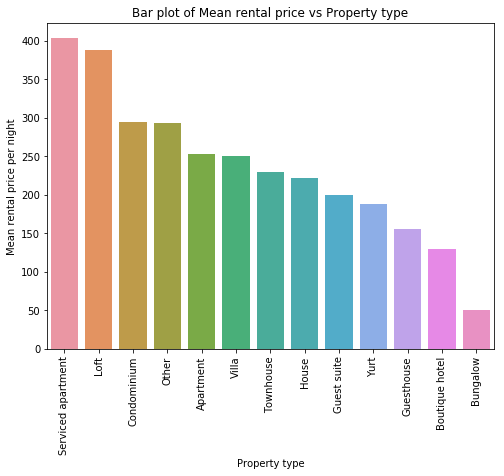

In [44]:
# Plotting the bar graph of price vs property_type
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'property_type', y = 'price', data = property_price)
ax.set_title('Bar plot of Mean rental price vs Property type')
ax.set_xlabel('Property type')
ax.set_ylabel('Mean rental price per night')
plt.xticks(rotation=90)

Serviced Apartment, Loft and Condominium are top 3 property types with highest mean rental prices per night. While, Bungalow has the least mean rental price per night.

Text(3.8000000000000043, 0.5, 'Cleaning fees per stay')

<Figure size 720x432 with 0 Axes>

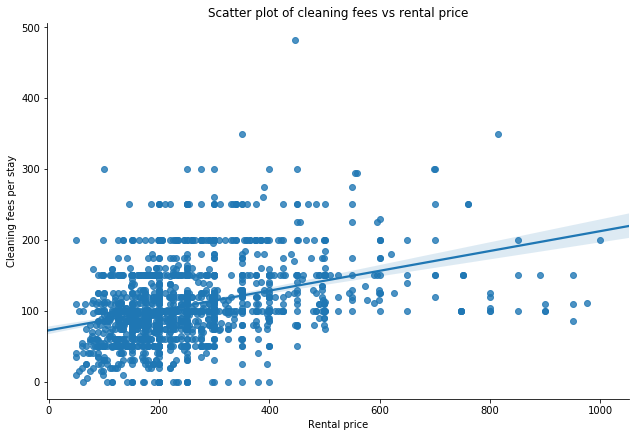

In [45]:
# Checking the relationship between price and cleaning fee
plt.figure(figsize=(10,6))
sns.lmplot(x='price', y='cleaning_fee', data=airbnb_zillow_joined, height=6, aspect=1.5)
plt.title('Scatter plot of cleaning fees vs rental price')
plt.xlabel('Rental price')
plt.ylabel('Cleaning fees per stay')

There is a positive correlation between price and cleaning_fee. This means that as price increases, the cleaning fees also increases

## Approaches to find profitable properties


### Approach 1: Selection of top zipcodes based on Breakeven period Analysis

To differentiate the zipcodes that would be profitable to invest in, we need to do breakeven period analysis. Through this, we will basically be calculating the amount of time that would be required to earn back the amount of money we invested in. 

\begin{equation*}
{Breakeven Time (years)} = \frac{Investment}{Annual Revenue} 
\end{equation*}

- Investment will be the amount of money invested to buy the house. We will be using Median price of the 2 Bedroom houses of the respective zipcode in the formula.
- Earnings will be the from rent and cleaning fees. We are assuming the occupancy rate to be 75% here. Also, the cleaning fees is included taking into consideration that the owner will be charging extra and not all of it will be going towards cleaning of the apartment. We are taking into consideration that 25% of cleaning fees will be accounted in earnings.

Note: In actual scenario, the expenses should have been deducted from the Annual Revenue. However, the expenses data is not available in the data so we are assuming that there will be no operational expenses incured

In [46]:
# Creating a new variable called Annual revenue which is the money generated from the apartment in a year
airbnb_zillow_joined['Annual_Revenue'] = (airbnb_zillow_joined['price']*
                                          365*0.75) + (airbnb_zillow_joined['cleaning_fee']*365*0.75*0.25)

C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Madhusudan Rudresh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


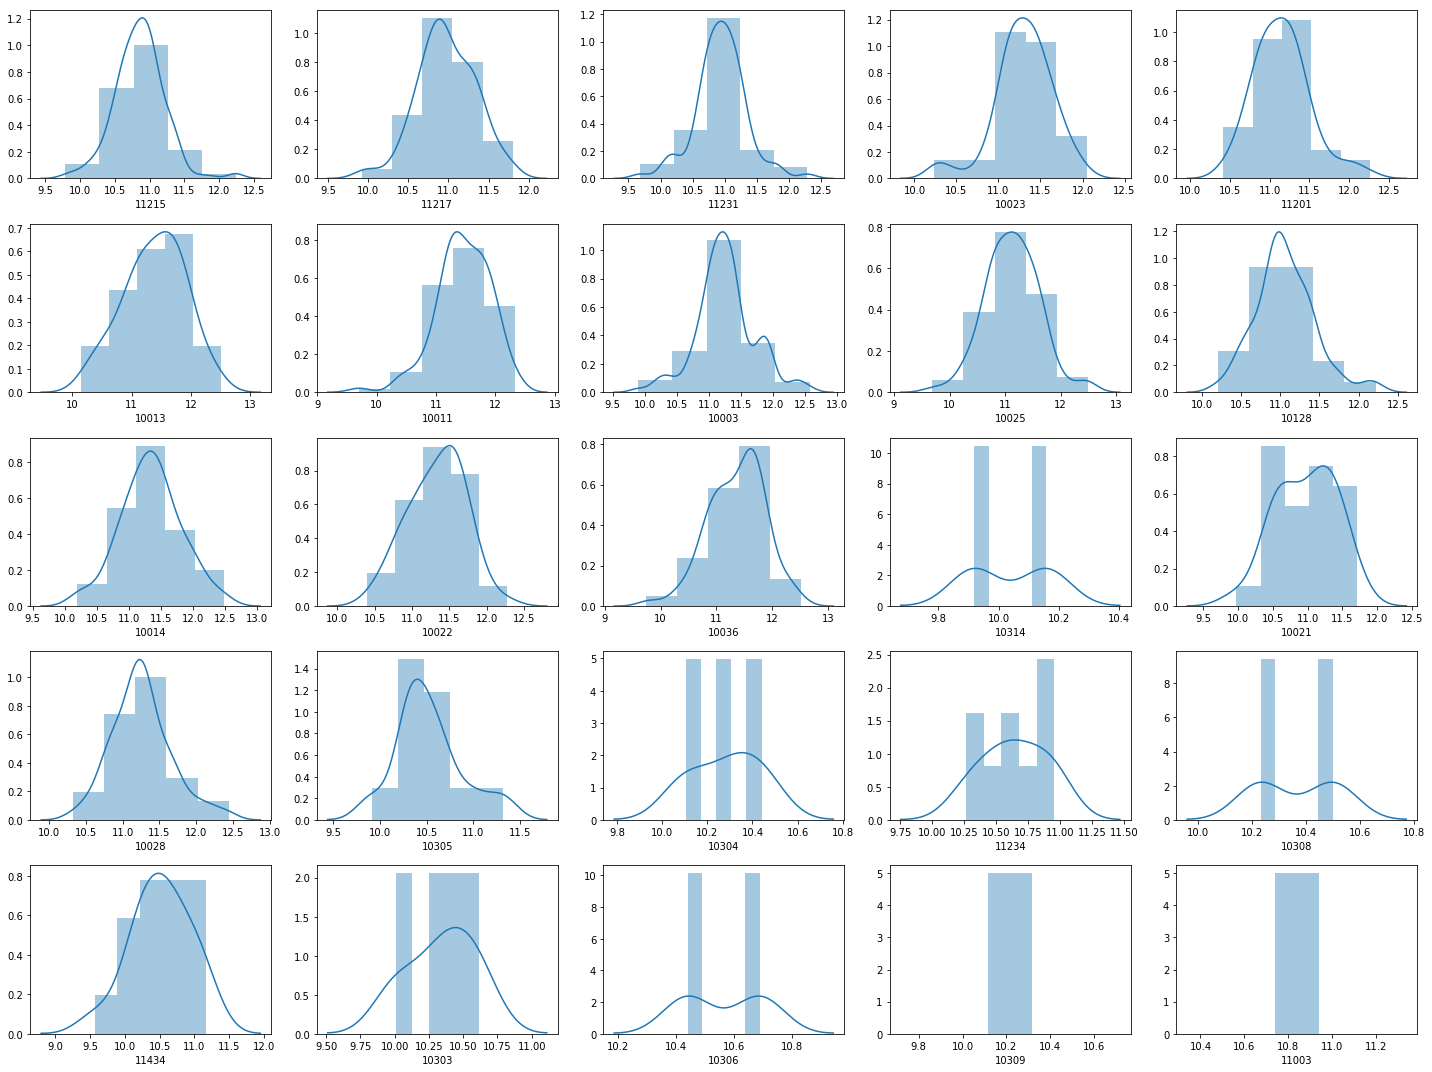

In [47]:
# Checking if the Annual_Revenue of all the zipcodes follows the normal distribution
f, axes = plt.subplots(5, 5, figsize=(20,15))

a = airbnb_zillow_joined['zipcode'].unique().tolist()
b=0

# Plotting the graph for every zipcode if the price follows the normal distribution
for i in range(0,5):
    for j in range(0,5):
        sns.distplot(np.log(airbnb_zillow_joined[airbnb_zillow_joined['zipcode']==a[b]]['Annual_Revenue']),
                     bins=5, ax=axes[i][j], axlabel=a[b])    
        
        b=b+1
plt.tight_layout()

Annual Revenue follows a normal distribution for most of the zipcodes. This means that if we decide to use any machine learning algorithm using this data at a later stage, then the errors will be minimal.

In [48]:
# Creating a new variable called breakeven_period which is the period of time it will take to start earning profits
airbnb_zillow_joined['Breakeven_period'] = airbnb_zillow_joined['Median_price']/airbnb_zillow_joined['Annual_Revenue']

In [49]:
# Most profitable zipcodes based on breakeven period
profit_zipcodes = airbnb_zillow_joined.groupby(by=['zipcode','neighbourhood_group_cleansed'], 
                                               as_index=False)['Breakeven_period'].mean().sort_values('Breakeven_period')
profit_zipcodes.reset_index(drop=True).head()

,zipcode,neighbourhood_group_cleansed,Breakeven_period
0,11003,Queens,6.82
1,10306,Staten Island,9.19
2,10303,Staten Island,10.85
3,11434,Queens,11.25
4,10304,Staten Island,11.35


In [50]:
# Saving the dataset to continue an analysis on Tableau
airbnb_zillow_joined.to_csv('breakeven_analysis.csv')

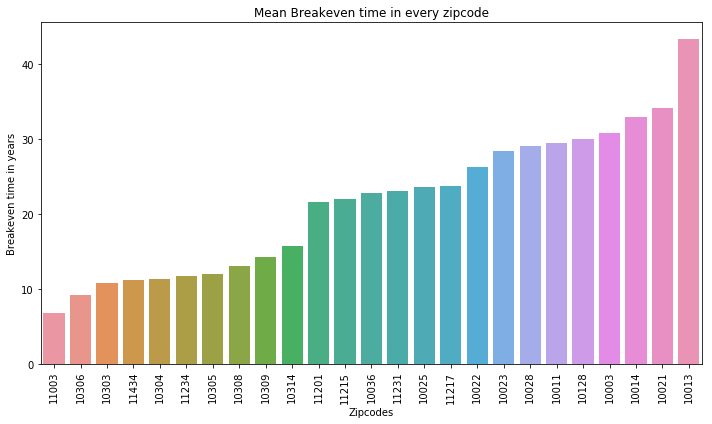

In [51]:
# Plotting the breakeven analysis graph 
plt.figure(figsize = (10,6))

ax = sns.barplot(x='zipcode', y='Breakeven_period', data=profit_zipcodes, order=profit_zipcodes['zipcode'])
plt.xticks(rotation=90)
ax.set_title('Mean Breakeven time in every zipcode')
ax.set_xlabel('Zipcodes')
ax.set_ylabel('Breakeven time in years')
plt.xticks(rotation=90)
plt.tight_layout()

From the above graph, we can see that zipcodes which will be profitable to invest in from the standpoint of reaching breakeven faster are 11003, 10306, 10303, 11434 and 10304

Attached below is the snapshot of breakeven analysis done on Tableau. The size of the bubble indicates the median price of the houses in the respective zipcodes. The color of the bubble indicates how fast it would take to approximately breakeven. Green indicates a faster breakeven while red indicates that it would take longer to breakeven.  

![alt text](breakeven_new.jpg "Breakeven")

We can see that most of the properties in Staten Island have dark green bubbles indicating that properties in this neighborhood reach breakeven faster, followed by Queens and Brooklyn.

In [52]:
# Creating a mean_price dataframe which has mean prices of all the properties located in the particular zipcode
mean_price = airbnb_zillow_joined.groupby(by='zipcode',as_index=False)['price'].mean()

In [53]:
# Joining the profit_zipcodes data with mean_price data
breakeven_meanprice = profit_zipcodes.merge(mean_price, on='zipcode', how='left')

Text(0, 0.5, 'Mean Rental price')

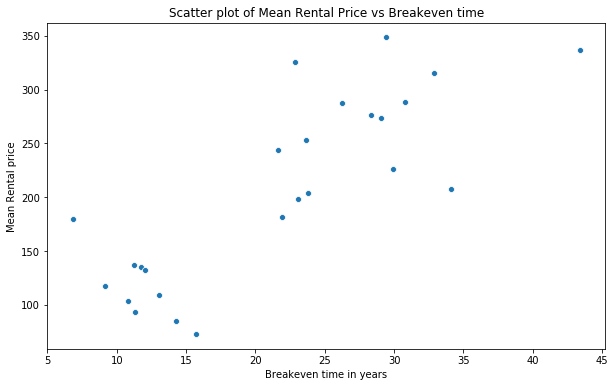

In [54]:
# Creating a scatterplot between breakeven period and mean rent price of the zipcode in the new york city 
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x='Breakeven_period', y='price', data=breakeven_meanprice)
ax.set_title('Scatter plot of Mean Rental Price vs Breakeven time')
ax.set_xlabel('Breakeven time in years')
ax.set_ylabel('Mean Rental price')

We can see a positive correlation between price and breakeven period. Zipcodes with lower mean rental prices have faster breakeven period compared with properties with higher mean rental price.

### Approach 2 - Selection of zipcodes based of appreciation of zipcodes in last 5 years

In this approach, we will be calculating the appreciation of every zipcode and then selecting the top zipcodes based on its value. The logic behind this approach is that, the zipcodes which gains its value faster will be desirable to invest in. This approach has some underlying assumptions such as:
1. The appreciation rate in the past will stay the same in the future also.
2. The real estate economy will stay the same as it was before. Therefore, there would be no economy decline or crisis in the nearby future.

The appreciation is caculated by the formula given below

\begin{equation*}
{Appreciation} = \frac{New Price - Old Price}{Old Price} 
\end{equation*}

In [55]:
# Creating a new dataframe to get median price of zipcodes dating 5 years back  
zillow.rename(columns={'RegionName':'zipcode'}, inplace=True)
complete = breakeven_meanprice.merge(zillow, on='zipcode',how='left')

In [56]:
# Selecting the relevant features from the dataset
complete = complete[['zipcode','neighbourhood_group_cleansed','Breakeven_period','price','2012-06','2017-06']]

In [57]:
# Calculating the appreciation based on the above formula
complete['Appreciation'] = (complete['2017-06']-complete['2012-06'])/complete['2012-06']

In [58]:
# Showing the dataset with appreciation value along with the breakeven preiod
complete = complete.sort_values(by='Appreciation', ascending=False).reset_index(drop=True)
complete.head()

,zipcode,neighbourhood_group_cleansed,Breakeven_period,price,2012-06,2017-06,Appreciation
0,11217,Brooklyn,23.79,203.83,666300.00,1302300,0.95
1,11231,Brooklyn,23.10,198.50,669900.00,1202900,0.80
2,11215,Brooklyn,21.95,181.61,616600.00,1070800,0.74
3,10128,Manhattan,29.96,226.16,1045000.00,1787100,0.71
4,11201,Brooklyn,21.60,243.68,836700.00,1420700,0.70


We can see that the zipcodes that we got in the approach 1 are completely different from the one we got in approach 2. This might be due to property prices rising at a faster rate than the rent prices, therefore leading to different results. 

According to this approach, the profitable zipcodes to invest in are 11217, 11231, 11215, 10128 and 11201

Text(0, 0.5, 'Appreciation')

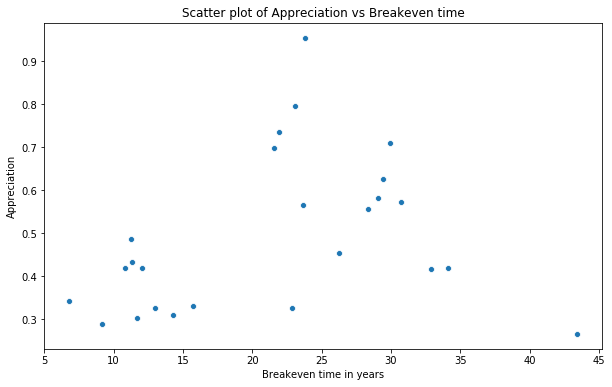

In [59]:
# Plotting Breakeven vs Appreciation graph
plt.figure(figsize = (10,6))
ax = sns.scatterplot('Breakeven_period','Appreciation',data=complete)
ax.set_title('Scatter plot of Appreciation vs Breakeven time')
ax.set_xlabel('Breakeven time in years')
ax.set_ylabel('Appreciation')

We can see that the properties with faster breakeven period have lesser appreciation value compared with the properties having longer breakeven period. Therefore it is better to do a tradeoff analysis, which is a comprimise between a breakeven analysis and appreciation analysis. 

### Approach 3: Trade off  between breakeven analysis analysis and appreciation analysis

After undergoing both approach 1 and approach 2, we come to a conclusion that both the analysis are important and need to be considered equally. Thus, there is going to be a tradeoff analysis, which means that zipcodes have to be considered equally based on breakeven, i.e. when they will start earning the profit and also based on the reasonable appreciation rate

### Solution

According to me, the approach 3 is the right solution which considers both breakeven analysis and appreciation analysis and comes to a conclusion that the tradeoff has to done between them. 

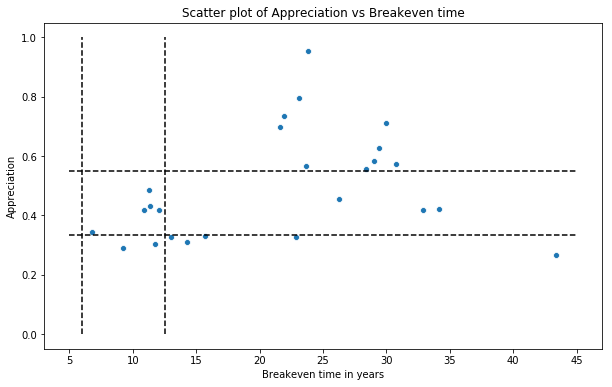

In [60]:
# Enclosing the important zipcode considering both approach 1 and approach 2
plt.figure(figsize = (10,6))
ax = sns.scatterplot('Breakeven_period','Appreciation',data=complete)

ax.set_title('Scatter plot of Appreciation vs Breakeven time')
ax.set_xlabel('Breakeven time in years')
ax.set_ylabel('Appreciation')

plt.vlines(x=[6,12.5], ymin=0, ymax=1, linestyle="dashed")
plt.hlines(y=[0.55,0.335], xmin=5, xmax=45,linestyle='dashed')

In [61]:
# Filtering the data representing the top zipcodes
complete[(complete['Appreciation'] > 0.335) & (complete['Appreciation'] < 0.55) & (complete['Breakeven_period'] > 6) & 
         (complete['Breakeven_period'] < 12.5)]

,zipcode,neighbourhood_group_cleansed,Breakeven_period,price,2012-06,2017-06,Appreciation
10,11434,Queens,11.25,136.88,257100.00,382300,0.49
12,10304,Staten Island,11.35,93.33,229200.00,328300,0.43
14,10303,Staten Island,10.85,104.00,230900.00,327700,0.42
15,10305,Staten Island,12.05,132.00,299700.00,425100,0.42
17,11003,Queens,6.82,180.00,258700.00,347500,0.34


According to the tradeoff analysis, the zipcodes enclosed in the box of 2 vertical and horizontal lines are the right to invest in. This is because they have the right appreciation value along with breakeven period. The recommended zipcodes to invest in are 11434, 10305, 10303, 10304, 11003

## Conclusion

According to me, approach 3 is the right way to decide on zipcodes to invest in. Therefore, following zipcodes should be considered for investment: 11434, 10305, 10303, 10304, 11003

## Things that could have been included

1. After inner joining the datasets (airbnb_set and zillow_set), the data decreased drastically to 1/4th of it. I could have used left join and scrapped the median house prices online for those zipcodes which were not available. This would have lead to better analysis.
2. Factors such as connectivity to subway station, proximity to restaurants nearby could have been used for analysis